<a href="https://colab.research.google.com/github/HYChangTAMU/Financial-Data-Analysis/blob/main/Assignment2/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

Using the data from project 1 and assume that we own $100 million of each stock.\
We want to compute the following quantities:

1. individual value at risk (VaR) and portfolio VaR

2. the Sharpe ratios using annual quantities for each stock

3. the maximum drawdown for each stock

# Problem 2
We are going to play two kinds of game.

Game 1: Flip the coin 100 times. I win 1 dollar for each head and loss 1 dollar for each tail.

Game 2: Flip the coin 1 time. I win 100 dollars on head and loss 100 dollars on tail.

To simulate the games, let's ask python to randomly pick -1 or +1 for 100 times for game 1 and to randomly pick -100 or +100 once for game 2.

In [31]:
import pandas as pd
import random

# game1: randomly pick -1 or +1 for 100 times, and return the sum
def game1():
  net_win = 0
  for i in range(100):
    net_win += random.choice([-1, 1])
  return net_win

# game2: randomly pick -100 or +100 once, and return the result
def game2():
  return random.choice([-100, 100])

## (a)

Let's play each game once. The results are

In [47]:
print(f"The result of game 1: {game1()}")

The result of game 1: 2


In [49]:
print(f"The result of game 2: {game2()}")

The result of game 2: 100


## (b)

Let's play game 1 and game 2 for 1,000,000 times!

In [51]:
# recording the results of playing game 1 for n times
def game1_n_times(n):
  l = []
  for i in range(n):
    l.append(game1())
  return l

# recording the results of playing game 2 for n times
def game2_n_times(n):
  l = []
  for i in range(n):
    l.append(game2())
  return l

# play both games for 1,000,000 times
game_1_results = game1_n_times(n = 1000000)
game_2_results = game2_n_times(n = 1000000)

# put the results into a dataframe
results = pd.DataFrame({"game 1" : game_1_results, "game 2" : game_2_results})

In [56]:
results

,game 1,game 2
0,-6,-100
1,-4,-100
2,-4,-100
3,-14,100
4,8,100
...,...,...
999995,0,-100
999996,6,-100
999997,14,-100
999998,-8,100


## (c)

The means and (sample) standard deviations can be easily calculated by built-in functions in pandas.\
Note that for a binomial random variable X ~ bi(100, 0.5), the mean is 50 and the variance is 25.\
For a Bernoulli random variable Y ~ bi(1, 0.5), the mean is 0.5 and the variance is 0.25.\
The outcome of game 1 is a random variable R1 = 2 X - 100.\
The outcome of game 2 is a random variable R2 = 200 Y - 100.

From here we get the theoretical means and variances:

1. Mean[R1] = 0 and Std[R1] = 10
2. Mean[R1] = 0 and Std[R2] = 100

which are very close to the result of the simulation.

In [89]:
results.describe().loc[["mean", "std"]]

,game 1,game 2
mean,-0.002610,0.04400
std,9.990369,100.00004


## (d)

We can plot the distributions of the results.\
Because there are 101 possible outcomes of each game, let's bin them into 101 cases.\
The distribution of game 1 looks normal.\
The distribution of game 2 is two peaks with almost the same height.

Text(0.5, 0, 'results')

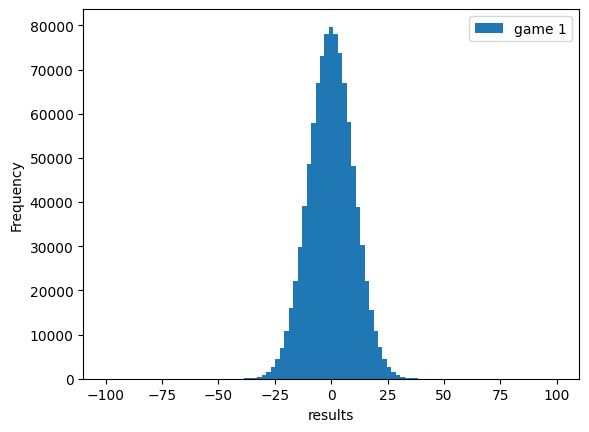

In [110]:
results.plot.hist(column = "game 1", bins = 101, range = [-100, 100]).set_xlabel("results")

Text(0.5, 0, 'results')

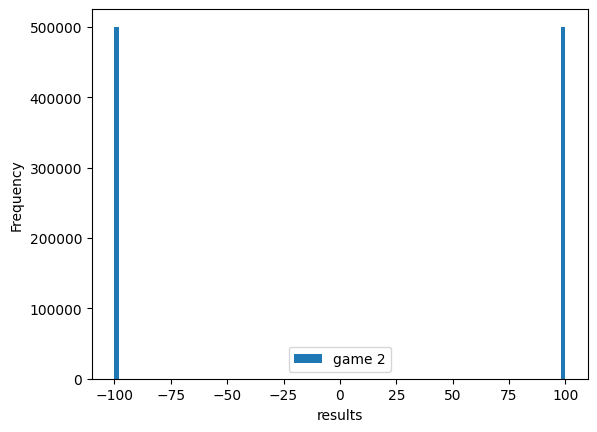

In [123]:
results.plot.hist(column = "game 2", bins = 101, range = [-100, 100]).set_xlabel("results")